# Figure 2: plots

In this notebook we collect all the plots corresponding to the Figure 2 of the Variational Waveguide paper.

In [1]:
import pickle 
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
%config InlineBackend.figure_format ="retina"
import matplotlib as mpl
mpl.rcParams["figure.dpi"] = 120
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [2]:
with open('/home/ctabares/variational_long_range-main/paper/residual_energy_dict_def.p','rb') as fp:
    residual_energies = pickle.load(fp)

with open('/home/ctabares/variational_long_range-main/paper/state_infidelity_dict_def.p','rb') as fp:
    state_infidelities = pickle.load(fp)

In [3]:
Ns = [8,10,12,14,16]
layers = [8,10,12,7,8]
gates = ['global_adiab',
         'global_all-to-all_adiab',
         'HVA_adiab',
         'brick-cnot_adiab_finrot','brick-cz_adiab_finrot',
         'hea-cnot_adiab','hea-cz_adiab']

#fig,ax = plt.subplots(len(Ns),1)
#fig.set_size_inches(2.25,2.25*len(Ns))
M = 6
colors = plt.cm.viridis(np.linspace(0,1,M))
epsilon = 0.01

layers_minimum_dict = {}
for gate in gates:
    minimum_layer_as_N = []
    for i,N in enumerate(Ns):
        array = []
        total_layers = np.arange(1,layers[i]+1)
        for layer in total_layers:
            array.append(state_infidelities[f'N={N}'][f'layers={layer}'][gate])
        for j,element in enumerate(array):
            if element<epsilon:
                minimum_layer_as_N.append(j+1)
                break
            elif j==len(array)-1:
                minimum_layer_as_N.append(None)
            #minimum_layer_as_N.append(None)
        #print(f'N={N}, layers={layer}, gate ={gate}')
    layers_minimum_dict[gate] = minimum_layer_as_N
        
    

In [4]:
layers_minimum_dict

{'global_adiab': [2, 3, 3, 3, 4],
 'global_all-to-all_adiab': [None, None, None, None, None],
 'HVA_adiab': [4, 5, 6, 7, 8],
 'brick-cnot_adiab_finrot': [3, 3, 4, 5, 8],
 'brick-cz_adiab_finrot': [3, 4, 5, 6, 8],
 'hea-cnot_adiab': [None, None, None, None, None],
 'hea-cz_adiab': [8, None, 12, None, None]}

In [5]:
gates

['global_adiab',
 'global_all-to-all_adiab',
 'HVA_adiab',
 'brick-cnot_adiab_finrot',
 'brick-cz_adiab_finrot',
 'hea-cnot_adiab',
 'hea-cz_adiab']

In [6]:
for gate in gates:
    print(gate[0:3])

glo
glo
HVA
bri
bri
hea
hea


global_adiab
HVA_adiab
brick-cz_adiab_finrot


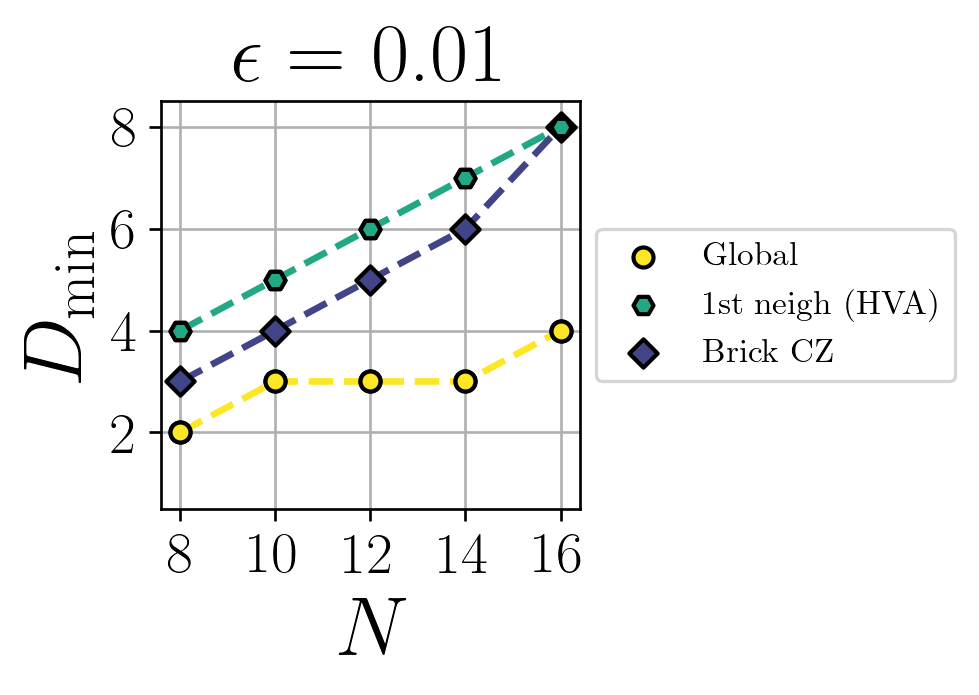

In [7]:
fig,ax = plt.subplots(1,1)
fig.set_size_inches(2.25,2.25)
M = 6
colors = plt.cm.viridis(np.linspace(0,1,M))
total_qubits = np.arange(8,17,2)

markers = [ 'o',
            'H',
            's', 'd',
            's', 'd']

markers = [ 'o',
            'H',
            'D', 's']
            
labels = [ r'Global',
           r'1st neigh (HVA)',
           r'Brick CZ']
           
gates = ['global_adiab',
         'HVA_adiab',
         'brick-cz_adiab_finrot']

colors2 = [i for j,i in enumerate(colors) if j<2 for _ in (0,1)]
colors_plot = (colors2+[colors[-3]]+[colors[-1]])[::-1]

for gate,marker,label,color in zip(gates,markers,labels,colors_plot):
    if gate[0:3]=='hea':
        pass
    else:
        ax.scatter(total_qubits,layers_minimum_dict[gate],label=label,linewidth=1.25,marker=marker,edgecolor='black', facecolor=color,zorder=10)
        ax.plot(total_qubits,layers_minimum_dict[gate],linewidth=2,color=color,linestyle='dashed',zorder=-1)
        print(gate)
    if gate[0:3]=='glo':
        ax.scatter(total_qubits,layers_minimum_dict[gate],linewidth=1.25,marker=marker,edgecolor='black', facecolor=color,zorder=120)
        pass
    if gate[0:3]=='HVA':
        ax.scatter(total_qubits,layers_minimum_dict[gate],linewidth=1.25,marker=marker,edgecolor='black', facecolor=color,zorder=100)
        pass




ax.set_xlabel(r'$N$',fontsize=25)
ax.set_ylabel(r"$D_{\mathrm{min}}$",fontsize=25)
ax.tick_params(axis='both', labelsize=17.5)

ax.set_title(r'$\epsilon=$ '+str(epsilon),fontsize=25)
ax.set_xticks([8,10,12,14,16])
ax.set_xticklabels([r'8',r'10',r'12',r'14',r'16'])
ax.set_yticks([2,4,6,8])
ax.set_yticklabels([r'2',r'4',r'6',r'8'])
ax.set_ylim([0.5,8.5])
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 1., box.height])
# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))#ax.legend(loc=6,fontsize=12)
plt.grid()
#plt.setp(ax, ylim=ax1.get_ylim())


plt.savefig("/home/ctabares/variational_long_range-main/paper/figures/figure1/figure1_epsilon={:}.pdf".format(epsilon),bbox_inches='tight',dpi=600)

In [8]:
gates

['global_adiab',
 'global_all-to-all_adiab',
 'HVA_adiab',
 'brick-cnot_adiab_finrot',
 'brick-cz_adiab_finrot',
 'hea-cnot_adiab',
 'hea-cz_adiab']

In [28]:
total_qubits = np.arange(8,17,2)
total_layers = total_qubits/2
print(total_qubits*total_layers)

[ 32.  50.  72.  98. 128.]


In [3]:
total_qubits = np.arange(2,2*25,2)
total_layers = total_qubits/2

number_params = {'global_adiab': 3*total_layers,
                 'global_all-to-all_adiab': 2*total_layers,
                 'HVA_adiab': 2*total_layers,
                 'brick-cnot_adiab_finrot': 2*total_qubits*total_layers+total_qubits,'brick-cz_adiab_finrot': 2*total_qubits*total_layers+total_qubits,
                 'hea-cnot_adiab': 3*total_qubits*total_layers-total_qubits,'hea-cz_adiab': 3*total_qubits*total_layers-total_qubits }

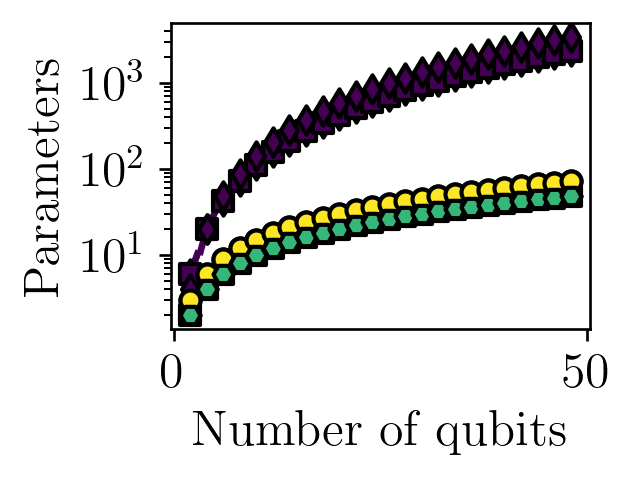

In [10]:
fig,ax = plt.subplots(1,1)
fig.set_size_inches(2.25,2.25*0.75)
M = 4
N=16
colors = plt.cm.viridis(np.linspace(0,1,M))
total_layers = np.arange(2,2*25,2)

markers = [ 'o',
            'H',
            's', 'd',
            's', 'd']
            
labels = [ r'Global',
           r'HVA',
           r'Brick CNOT',r'Brick CZ',
           r'HEA CNOT',r'HEA CZ']
           
colors2 = [i for j,i in enumerate(colors) if j<2 for _ in (0,1)]
colors_plot = (colors2+[colors[-2]]+[colors[-1]])[::-1]

for gate,marker,label,color in zip(gates,markers,labels,colors_plot):
    #if gate[0:3]=='hea':
        #pass
    #else:

    ax.scatter(total_layers,number_params[gate],label=label,linewidth=1.25,marker=marker,edgecolor='black', facecolor=color,zorder=10)
    ax.plot(total_layers,number_params[gate],linewidth=2,color=color,linestyle='dashed',zorder=-1)
    if gate[0:3]=='glo':
        ax.scatter(total_layers,number_params[gate],label=label,linewidth=1.25,marker=marker,edgecolor='black', facecolor=color,zorder=120)
        pass

ax.set_yscale('log')


ax.set_xlabel(r'Number of qubits',fontsize=15)
ax.set_ylabel(r"Parameters",fontsize=15)
ax.tick_params(axis='both', labelsize=15)
"""
ax.set_title(r'$\epsilon=$ '+str(epsilon),fontsize=25)
ax.set_xticks([8,10,12,14,16])
ax.set_xticklabels([r'8',r'10',r'12',r'14',r'16'])
ax.set_yticks([2,4,6,8])
ax.set_yticklabels([r'2',r'4',r'6',r'8'])
ax.set_ylim([0.5,8.5])
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 1., box.height])
# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))#ax.legend(loc=6,fontsize=12)
plt.grid()
#plt.setp(ax, ylim=ax1.get_ylim())
"""

plt.savefig("figures/figure1/params_vs_N-log.png".format(epsilon),bbox_inches='tight',dpi=600)

gate: global_adiab
gate: global_all-to-all_adiab
gate: HVA_adiab
gate: brick-cnot_adiab_finrot
gate: brick-cz_adiab_finrot
gate: hea-cnot_adiab
gate: hea-cz_adiab


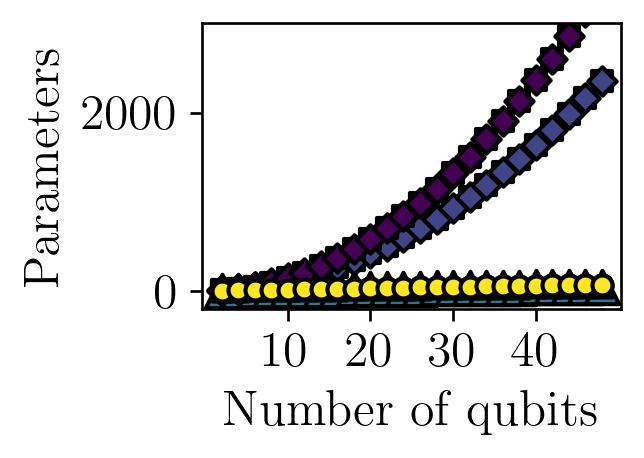

In [38]:
fig,ax = plt.subplots(1,1)
fig.set_size_inches(2.25,2.25*0.7)
M = 6
N=16
colors = plt.cm.viridis(np.linspace(0,1,M))
total_qubits = np.arange(2,2*25,2)


markers = [ 'o',
            '^',
            'H',
            's', 'D',
            's', 'D']
            
labels = [ r'Global',
           r'Global all-to-all',
           r'1st neigh',
           r'Brick CNOT',r'Brick CZ',
           r'HEA CNOT',r'HEA CZ']

           
colors_def = [colors[-1],colors[-4],colors[-3],colors[1],colors[1],colors[0],colors[0]]

for gate,marker,label,color in zip(gates,markers,labels,colors_def):
    print('gate:', gate)
    #if gate[0:3]=='hea':
        #pass
    #else:
    if gate == 'global_all-to-all_adiab':
        ax.scatter(total_qubits,number_params[gate],s=100,label=label,linewidth=1.25,marker=marker,edgecolor='black', facecolor=color,zorder=10)
    if gate[0:3] == 'hea':
        ax.scatter(total_qubits,number_params[gate],label=label,linewidth=1.25,marker=marker,edgecolor='black', facecolor=color,zorder=10)
    else:
        ax.scatter(total_qubits,number_params[gate],label=label,linewidth=1.25,marker=marker,edgecolor='black', facecolor=color,zorder=10)
        ax.plot(total_qubits,number_params[gate],linewidth=2,color=color,linestyle='dashed',zorder=-1)
    if gate=='global_adiab':
        ax.scatter(total_qubits,number_params[gate],label=label,linewidth=1.25,marker=marker,edgecolor='black', facecolor=color,zorder=120)
        pass

#ax.set_yscale('log')


ax.set_xlabel(r'Number of qubits',fontsize=15)
ax.set_ylabel(r"Parameters",fontsize=15)
ax.tick_params(axis='both', labelsize=15)
"""
ax.set_title(r'$\epsilon=$ '+str(epsilon),fontsize=25)
ax.set_xticks([8,10,12,14,16])
ax.set_xticklabels([r'8',r'10',r'12',r'14',r'16'])
ax.set_yticks([2,4,6,8])
ax.set_yticklabels([r'2',r'4',r'6',r'8'])
ax.set_ylim([0.5,8.5])
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 1., box.height])
# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))#ax.legend(loc=6,fontsize=12)
plt.grid()
#plt.setp(ax, ylim=ax1.get_ylim())
"""
ax.set_xticks([10,20,30,40])
ax.set_xticklabels([r'10',r'20',r'30',r'40'])
#ax.set_yticks([1000,2000])
#ax.set_yticklabels([r'1000',r'2000'])
ax.set_ylim([-200,3000])
plt.savefig("figures/figure1/params_vs_N.pdf".format(epsilon),bbox_inches='tight',dpi=600)